<a href="https://colab.research.google.com/github/jalonzoh/challenge-telecomx/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción


## **Importamos librerarias y asignado valor a la URL**

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
# Si importo el archivo de esta forma tendria que normalizar las columnas con diccionarios y concatenar todas al final
#df=pd.read_json(url)
#df.head()

## **Creacion de funcion y asignacion a un dataframe de los datos normalizados**

In [2]:
#Valido si la conexion es exitosa y el archivo de texto lo nomalizo.
respuesta=requests.get(url)
#print("El codigo de conexion es: ", respuesta.status_code)
if respuesta.status_code == 200:
  resultado_texto = json.loads(respuesta.text)
  df_telecomx=pd.json_normalize(resultado_texto)
else:
  print(f"La petición falló con código: {respuesta.status_code}")



#🔧 Transformación

## **Analisis Descriptivo**

In [3]:
#DataFrame con las dos primeras columnas
##df_col_custumerID_Churn=df[['customerID','Churn']]
##df_col_custumerID_Churn.head()

In [4]:
#Normalizando columnas 'customer'	'phone'	'internet'	'account'
##df_customer=pd.json_normalize(df['customer'])
##df_phone=pd.json_normalize(df['phone'])
##df_internet=pd.json_normalize(df['internet'])
##df_account=pd.json_normalize(df['account'])

#Concatenando las 2 columnas y las demas columnas normalizadas
##df_telecomx=pd.concat([df_col_custumerID_Churn,df_customer,df_phone,df_internet,df_account],axis=1)

#Resultado del Data Frame normalizado, y ano necesito hacer los pasos anteriores.
df_telecomx.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
#Conociendo las Columnas del Dataset
df_telecomx.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
#Tipos de datos de las columnas
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **Diccionario de Datos**

* **customerID:** número de identificación único de cada cliente
* **Churn:**si el cliente dejó o no la empresa
* **gender:** género (masculino y femenino)
* **SeniorCitizen:** información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* **Partner:** si el cliente tiene o no una pareja
* **Dependents:** si el cliente tiene o no dependientes
* **tenure:**meses de contrato del cliente
* **PhoneService:**suscripción al servicio telefónico
* **MultipleLines:** suscripción a más de una línea telefónica
* **InternetService:** suscripción a un proveedor de internet
* **OnlineSecurity:**suscripción adicional de seguridad en línea
* **OnlineBackup:** suscripción adicional de respaldo en línea
* **DeviceProtection:**suscripción adicional de protección del dispositivo
* **TechSupport:**suscripción adicional de soporte técnico,
  menor tiempo de espera
* **StreamingTV:** suscripción de televisión por cable
* **StreamingMovies:** suscripción de streaming de películas
* **Contract:** tipo de contrato
* **PaperlessBilling:** si el cliente prefiere recibir la  
  factura en línea
* **PaymentMethod:** forma de pago
* **Charges.Monthly:** total de todos los servicios del cliente por mes
* **Charges.Total:** total gastado por el cliente

## **Columnas Releventes para el analisis de la evasión**

* **customerID:**  columna princial (Llave primaria).
* **Churn:** (SI/NO) para evaluar la evasion.
* **gender:** (masculino y femenino) para evaluar la evasion
  por genero.
* **SeniorCitizen:** Evaluar el impacto de evasion de
  personas mayores a 65 años
* **tenure:** Evaluar la evasion por meses de contrato
* **PhoneService:**suscripción al servicio telefónico
* **MultipleLines:** suscripción a más de una línea telefónica
* **InternetService:** suscripción a un proveedor de internet
* **OnlineSecurity:**suscripción adicional de seguridad en línea
* **DeviceProtection:**suscripción adicional de protección del dispositivo
* **TechSupport:**suscripción adicional de soporte técnico,
  menor tiempo de espera
* **StreamingTV:** suscripción de televisión por cable
* **StreamingMovies:** suscripción de streaming de películas
* **Contract:** tipo de contrato
* **PaymentMethod:** forma de pago
* **Charges.Monthly:** consumo por mes.
* **Charges.Total:** consumo total.




In [7]:
df_telecomx.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [8]:
df_telecomx.describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


## **Revision de las columnas inpactantes para el analisis**

In [9]:
#Verificando Valores unicos en cada una de las Columnas
for col in df_telecomx.columns:
  print('-' * 60 )
  print(f"Valores unicos en la columna {col}: {df_telecomx[col].nunique()}")
  if df_telecomx[col].nunique() < 10:
    print(f"Valores: {list(df_telecomx[col].unique())}")
    print('=' * 60)

------------------------------------------------------------
Valores unicos en la columna customerID: 7267
------------------------------------------------------------
Valores unicos en la columna Churn: 3
Valores: ['No', 'Yes', '']
------------------------------------------------------------
Valores unicos en la columna customer.gender: 2
Valores: ['Female', 'Male']
------------------------------------------------------------
Valores unicos en la columna customer.SeniorCitizen: 2
Valores: [np.int64(0), np.int64(1)]
------------------------------------------------------------
Valores unicos en la columna customer.Partner: 2
Valores: ['Yes', 'No']
------------------------------------------------------------
Valores unicos en la columna customer.Dependents: 2
Valores: ['Yes', 'No']
------------------------------------------------------------
Valores unicos en la columna customer.tenure: 73
------------------------------------------------------------
Valores unicos en la columna phone.Pho

In [10]:
#Validando Valores Duplicados.
duplicados=df_telecomx.duplicated().sum()
print(f"Cantidad de lineas duplicados: {duplicados}")

Cantidad de lineas duplicados: 0


In [11]:
#Validando Valores Nulos
valores_nulos=df_telecomx.isnull().values.sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos[valores_nulos >0 ])

Cantidad de valores nulos por columna:
[]


In [12]:
#Validando valores en blanco
valores_en_blanco=df_telecomx.apply(lambda x: x.astype(str).str.strip()=='').sum()
print("\nCantidad de valores en blanco o string por columna:")
print(valores_en_blanco[valores_en_blanco >0 ])


Cantidad de valores en blanco o string por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [13]:
#Cambiando columnas que que deben ser tipo string
for columna in df_telecomx.columns:
    if df_telecomx[columna].dtype == 'object':
        try:
            # Corrección: usar 'columna' en singular
            df_telecomx[columna] = df_telecomx[columna].astype(pd.StringDtype())
            # Opcional: imprimir si la conversión fue exitosa para esa columna
            # print(f"Columna '{columna}' convertida a str.")
        except Exception as e:
            print(f'No pudo convertirse la columna {columna} a texto')

In [14]:
#Cambiando la columna "account.Charges.Total" a Float
df_telecomx['account.Charges.Total']=pd.to_numeric(df_telecomx['account.Charges.Total'],errors='coerce')
print(df_telecomx['account.Charges.Total'].dtype)

df_telecomx.info()

Float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7267 non-null   string 
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   string 
 5   customer.Dependents        7267 non-null   string 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   string 
 8   phone.MultipleLines        7267 non-null   string 
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    7267 non-null   string 
 11  internet.OnlineBackup      7267 non-null   string 
 12  internet.DeviceProtection  7267 non-null   string 
 13  internet.TechSupport       7267 non-null

In [15]:
# Eliminando las columnas vaias de Churn
df_telecomx = df_telecomx[df_telecomx['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_telecomx))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [16]:
# Despues de realizar las validaciones se vuelve a comprobar si aun hay nulos o valores en blanco
# Vacíos o en blanco
df_telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [17]:
df_telecomx.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.0
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.8
25%,0.000000,9.000000,35.500000,401.45
50%,0.000000,29.000000,70.350000,1397.475
75%,0.000000,55.000000,89.850000,3794.7375
max,1.000000,72.000000,118.750000,8684.8


## **Agregando  campo costo diario**

In [18]:
#Añadiendo la columna cuentas diaras al dataframe
df_telecomx['Cuentas_Diarias'] = df_telecomx['account.Charges.Monthly'] / 30
print(df_telecomx[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [19]:
df_telecomx = df_telecomx.drop('Cuentas_Diarias', errors='ignore')

In [20]:
df_telecomx

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [21]:
# Una vez realizado el ETL podemos realizamos el analisis

import plotly.express as px

## **Cantidad y porcentaje de clientes que abandonaron y no abandonaron la empresa**

In [22]:
#Cantidad total de clientes que abandonaron y no abandonaron la empresa
fig=px.histogram(df_telecomx, x = 'Churn', text_auto = True, color = 'Churn', barmode = 'group')
fig.show()

#Porcentaje total de clientes que abandonaron y no abandonaron la empresa
porcentaje_churn = round(df_telecomx['Churn'].value_counts(normalize=True)*100, 2)
names = ['Cliente', 'No Cliente']
fig=px.pie(df_telecomx,values=porcentaje_churn, names=names, title='Porcentaje de Evasion General')
fig.show()



## **Graficos para el analisis de la Columna Churn (Se fue de la empresa o no) y las variables categoricas**

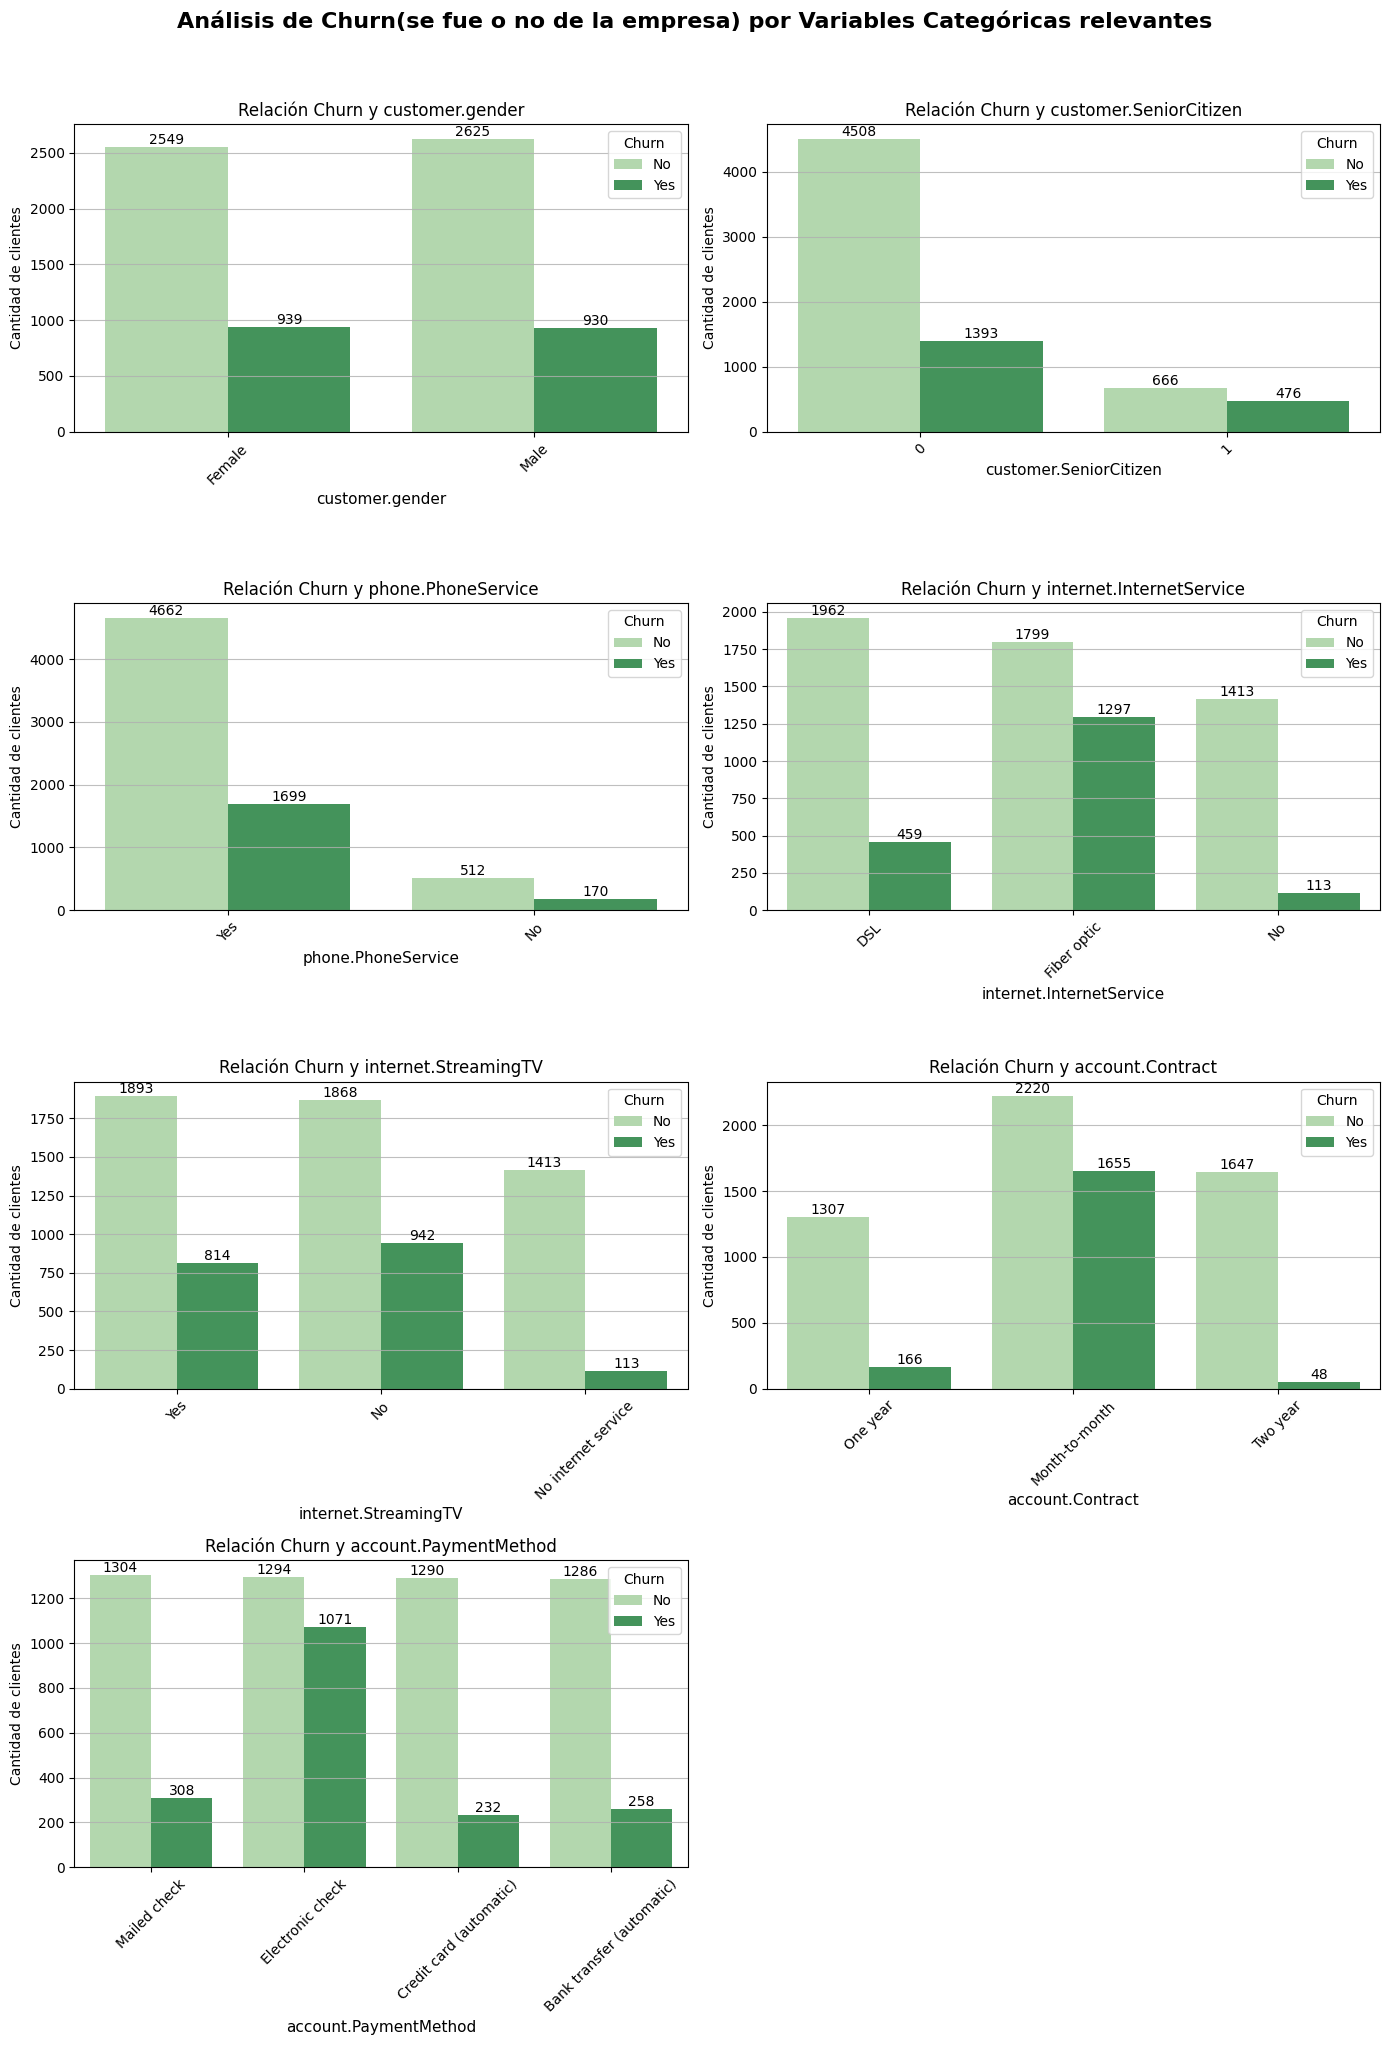

In [23]:
columnas_categoricas = ['customer.gender', 'customer.SeniorCitizen', 'phone.PhoneService','internet.InternetService',
                        'internet.StreamingTV',	'account.Contract',	'account.PaymentMethod']

numero_columnas = 2
numero_filas = (len(columnas_categoricas) + numero_columnas - 1) // numero_columnas # Ensure enough rows for all plots
fig, ax = plt.subplots(numero_filas, numero_columnas, figsize=(numero_columnas*7, numero_filas*5))
ax = ax.flatten()
plt.suptitle('Análisis de Churn(se fue o no de la empresa) por Variables Categóricas relevantes', fontsize=16, y=1.02, fontweight = 'bold')

for i, columna in enumerate(columnas_categoricas):
  if i < len(ax):

    sns.countplot(x=columna, hue='Churn', data=df_telecomx, ax=ax[i], palette='Greens')
    ax[i].set_title(f'Relación Churn y {columna}', fontsize = 12)
    ax[i].set_xlabel(columna, fontsize = 11)
    ax[i].set_ylabel('Cantidad de clientes')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend(title='Churn', labels=['No', 'Yes'])
    ax[i].grid(axis='y', linestyle='-', alpha=0.8)
    ax[i].bar_label(ax[i].containers[0])
    ax[i].bar_label(ax[i].containers[1])

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(top=1.2, right=0.8)
plt.tight_layout()
plt.show()

In [24]:
# Agrupar por tenure y Churn
df_grouped = df_telecomx.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcular el % de personas que abandonaron la empresa
df_grouped['churn_rate'] = round((df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100,1)

In [25]:
fig = px.line(df_grouped.reset_index(),
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Porcentaje de personas que abandonaron la empresa por mes')
fig.show()

In [26]:
fig = px.scatter(df_telecomx, x="customer.tenure", y="account.Charges.Total", size="account.Charges.Monthly", color="Churn",
           hover_name="account.Contract", log_x=False, size_max=10,title="Tenure(Meses de contrato) - Pago Total - Pago Mensual" )
fig.show()

## **Relación Churn y variables numéricas**

In [27]:
columnas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias' ]

for i, columna in enumerate(columnas_numericas):
  fig = px.box(df_telecomx, x='Churn', y=columna, title=f'Relación Churn y {columna}',color = 'Churn')
  fig.show()

## **Extra**

## **Cambio de texto a booleano en columnas Churn**

In [30]:
columnas_boolenas = ['Churn']
for columna in columnas_boolenas:
  df_telecomx[columna] = df_telecomx[columna].map({'Yes': 1, 'No': 0})
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   string 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   string 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   string 
 5   customer.Dependents        7043 non-null   string 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   string 
 8   phone.MultipleLines        7043 non-null   string 
 9   internet.InternetService   7043 non-null   string 
 10  internet.OnlineSecurity    7043 non-null   string 
 11  internet.OnlineBackup      7043 non-null   string 
 12  internet.DeviceProtection  7043 non-null   string 
 13  internet.TechSupport       7043 non-null   string 
 1

## **Creando Matriz de Correlacion**

In [31]:
variables_correlacionadas = ['Churn','customer.SeniorCitizen','customer.tenure',
                             'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
df_corr = df_telecomx[variables_correlacionadas].corr()
df_corr

,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
Churn,1.000000,0.150889,-0.352229,0.193356,-0.199484,0.193356
customer.SeniorCitizen,0.150889,1.000000,0.016567,0.220173,0.102411,0.220173
customer.tenure,-0.352229,0.016567,1.000000,0.247900,0.825880,0.247900
account.Charges.Monthly,0.193356,0.220173,0.247900,1.000000,0.651065,1.000000
account.Charges.Total,-0.199484,0.102411,0.825880,0.651065,1.000000,0.651065
Cuentas_Diarias,0.193356,0.220173,0.247900,1.000000,0.651065,1.000000


## **Creando Grafico de Correlacion**

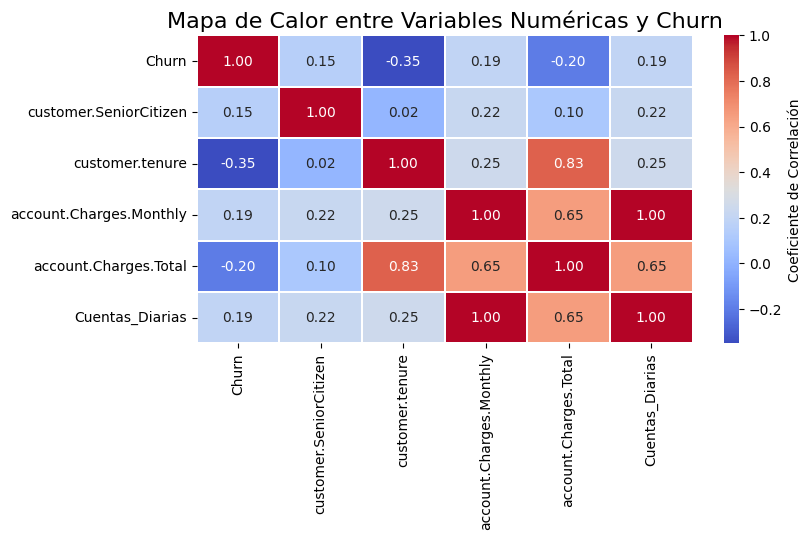

In [32]:
plt.figure(figsize=(8, 4))
sns.heatmap(
    df_corr,
    annot=True,      # Muestra los valores de correlación en las celdas
    cmap='coolwarm', # Elige un mapa de colores (coolwarm es bueno para correlaciones +/-)
    fmt=".2f",       # Formato de los números con dos decimales
    linewidths=.1,   # Líneas entre las celdas
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)
plt.title('Mapa de Calor entre Variables Numéricas y Churn', fontsize=16)
plt.show()

#📄Informe final

## ⚡ **Introducción**
La empresa TelecomX_Latam esta sufriendo una perdida de clientes, se nos encargo realizar el analisis
para identificar las causas de la desercion y recomendar acciones que eviten en un futuro el perder mas clientes.

## ⚡ **Limpieza y tratamiento de datos**



*   Se utiliza la siguiente URL https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json para que cada vez que se ejecute el cuaderno colab, se conecte sin necesidad de subir el archivo.

*   Usamos la función requests.get(url) perteneciente a la librería requests validamos que el resultado sea 200 caso contrario mostramos el mensaje de error.

*   Normalizamos la datos usando la funcón pandas.normalize_json().

*   Validación de valore unicos para cada columna.

*   Validación de valore duplicados para cada columna.

*   Validación de  valores  nulos  y vacíos.

*   Se convierte la columna Charges.Total  a float64

*   Se convierte la todas la columnas que tienen valor texto(object)  a String

*   Se identifica en la columna *Churn*  224 datos vacíos (3% del total de datos), se procede a eliminarlos.



## ⚡ **Analisis exploraotrio de Datos**

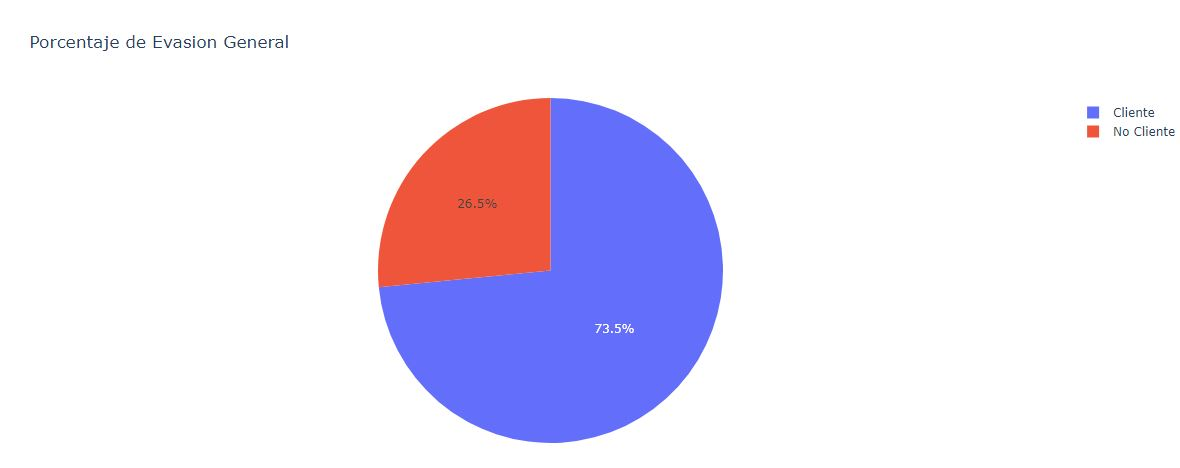

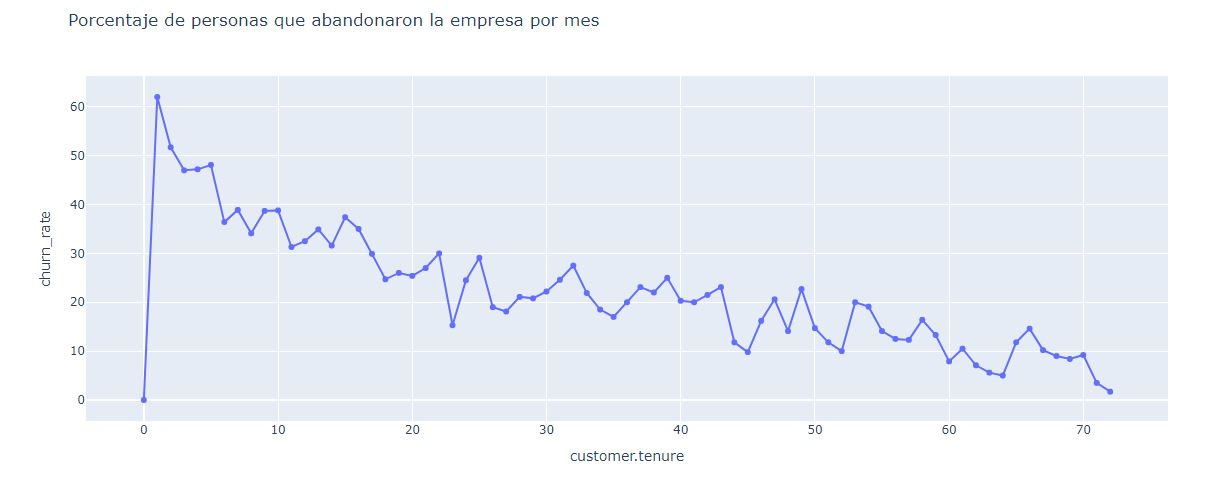

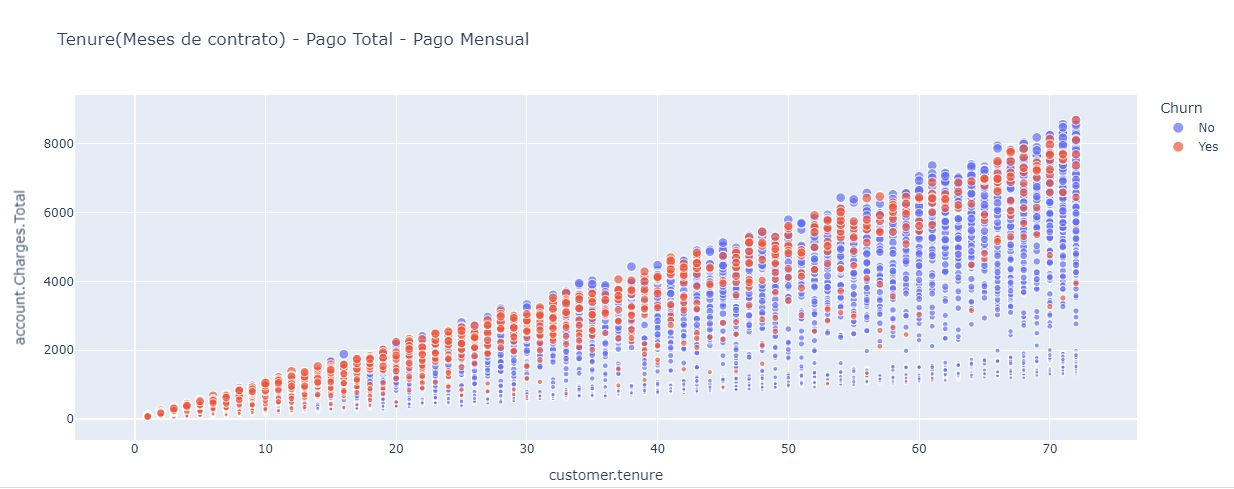

 ## ⚡ **Insights:**

1.   Un 26.5% de clientes abandonan la empresa.
2.   El género de los clientes no impacta en el abandono de la empresa.
3.   Es notorio que clientes que tienen servicio de Internet con fibra óptica abandonen la empresa debido a un moyor costo y pesimo servicio.
4.   En los contratos con pocos meses la mayor parte de clientes abandonan la empresa, se sugiere elimnar estis tipos de contrato.
5.   En el pago con cheque electrónico, hay una tendencia de mayor evasión de clientes, se sugiere eliminar este tipo de pago.
6.   Los clientes con pocos meses de permanencia versus los contratos mes a mes tienen mucha relacion . Se sugiere impulsar la venta de contratos a largo plazo.
7.   Hay una relacion entre clientes perdidos y costos altos de facturación, se debe hacer un equilibrio entre el servicio ofrecido y el costo de este.

## ⚡ **Recomendaciones**



1.   Captar a clientes que decidan tener contratos a largo plazo.

2.   Realizar un analisis adicional para identificar porque el servicio de internet por fibra optica tiene muchos clientes que abandonan la empresa.

3.   Implementar una encuesta y recopilar informacion de sugerencias o opiniones de los clientes y su insatisfacción.



# ♊ **Realizado por Jhon Alonzo**